In [1]:
!python -V

Python 3.11.7


In [2]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from mlflow import MlflowClient
from mlflow.entities import ViewType

TRACKING_URI = "sqlite:///mlflow.db"

## Question 1. Run Mage

In [32]:
!pwd

/workspaces/mlops-zoomcamp/03-orchestration


In [33]:
!mkdir homework_3

In [35]:
!ls -l

total 60
drwxrwxrwx+ 2 codespace codespace  4096 May 30 13:07 homework_3
-rw-rw-rw-  1 codespace codespace 56021 May 30 13:06 homework_3.ipynb


In [36]:
!wget https://github.com/mage-ai/mlops/archive/refs/heads/master.zip

--2024-05-30 13:08:01--  https://github.com/mage-ai/mlops/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/mage-ai/mlops/zip/refs/heads/master [following]
--2024-05-30 13:08:01--  https://codeload.github.com/mage-ai/mlops/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [ <=>                ]  93.72K  --.-KB/s    in 0.01s   

2024-05-30 13:08:01 (7.58 MB/s) - ‘master.zip’ saved [95967]



In [37]:
!mv master.zip homework_3

In [38]:
!ls -l homework_3

total 96
-rw-rw-rw- 1 codespace codespace 95967 May 30 13:08 master.zip


In [39]:
!unzip homework_3/master.zip

Archive:  homework_3/master.zip
64ab08ebe90022cdf742dfcddb634b1b5f296945
   creating: mlops-master/
  inflating: mlops-master/.env.dev   
  inflating: mlops-master/.gitignore  
  inflating: mlops-master/Dockerfile  
  inflating: mlops-master/README.md  
  inflating: mlops-master/docker-compose.yml  
   creating: mlops-master/mlops/
 extracting: mlops-master/mlops/__init__.py  
  inflating: mlops-master/mlops/design.yaml  
  inflating: mlops-master/mlops/metadata.yaml  
   creating: mlops-master/mlops/presenters/
   creating: mlops-master/mlops/presenters/overview/
   creating: mlops-master/mlops/presenters/overview/dashboard/
  inflating: mlops-master/mlops/presenters/overview/dashboard/block_layout.yaml  
   creating: mlops-master/mlops/presenters/pipelines/
   creating: mlops-master/mlops/presenters/pipelines/sklearn_training/
   creating: mlops-master/mlops/presenters/pipelines/sklearn_training/dashboard/
  inflating: mlops-master/mlops/presenters/pipelines/sklearn_training/dashboar

In [40]:
!rm -r homework_3/master.zip

In [43]:
!ls -l homework_3

total 0


In [44]:
!ls -l

total 64
drwxrwxrwx+ 2 codespace codespace  4096 May 30 13:08 homework_3
-rw-rw-rw-  1 codespace codespace 54160 May 30 13:11 homework_3.ipynb
drwxr-xr-x+ 5 codespace codespace  4096 May 29 14:22 mlops-master


### Run this command in the terminal
```
cd mlops-master
./scripts/start.sh
```

Go to URL http://127.0.0.1:6789


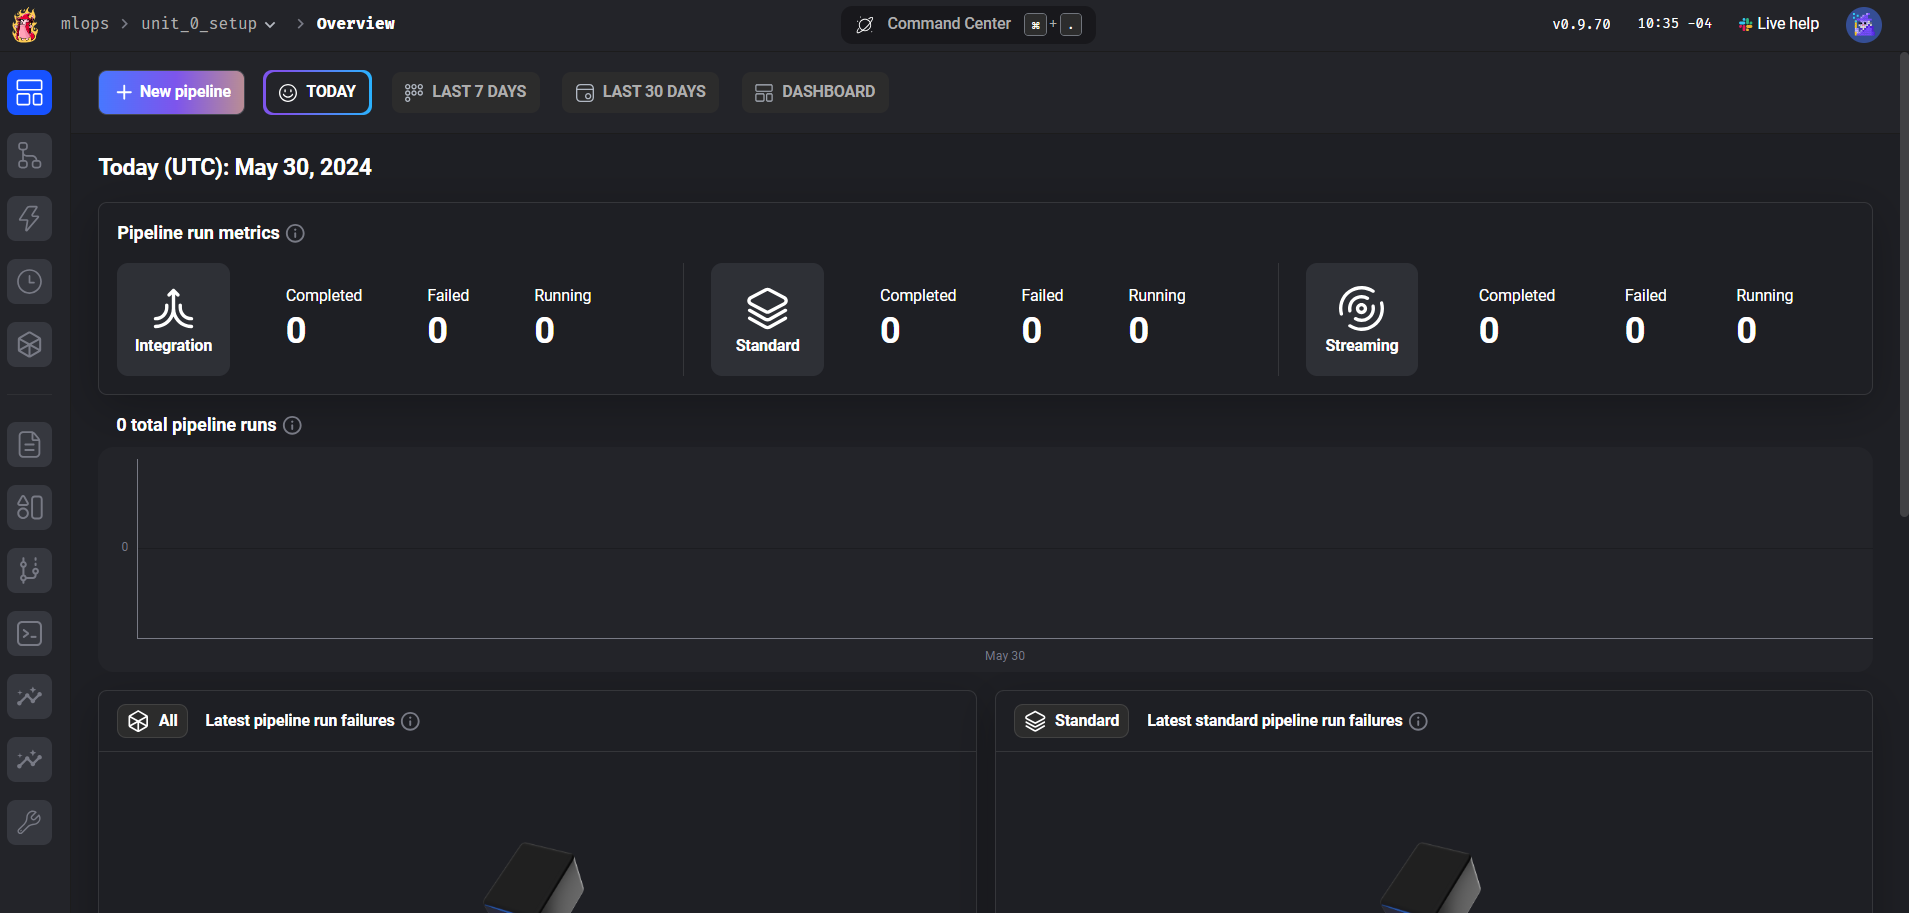

## Q2. Download and preprocess the data

In [4]:
!pwd

/workspaces/mlops-zoomcamp/02-experiment-tracking


In [5]:
!mkdir data

In [7]:
!ls

data  homework_2.ipynb	practica


In [8]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet

--2024-05-28 15:24:41--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.32.192.124, 13.32.192.2, 13.32.192.116, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.32.192.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1427002 (1.4M) [binary/octet-stream]
Saving to: ‘green_tripdata_2023-01.parquet’

green_tripdata_2023 100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2024-05-28 15:24:41 (19.5 MB/s) - ‘green_tripdata_2023-01.parquet’ saved [1427002/1427002]

--2024-05-28 15:24:42--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.32.192.116, 13.32.192.2, 13.32.192.124, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.32.192.116|:443... connected.
HTTP request sent, a

In [14]:
!ls -l

total 4632
drwxrwxrwx+ 2 codespace codespace    4096 May 28 15:22 data
-rw-rw-rw-  1 codespace codespace 1427002 Mar 20  2023 green_tripdata_2023-01.parquet
-rw-rw-rw-  1 codespace codespace 1533740 May  1  2023 green_tripdata_2023-02.parquet
-rw-rw-rw-  1 codespace codespace 1730999 May 19  2023 green_tripdata_2023-03.parquet
-rw-rw-rw-  1 codespace codespace   34127 May 28 15:25 homework_2.ipynb
drwxrwxrwx+ 2 codespace codespace    4096 May 28 15:21 practica


In [15]:
! mv green_tripdata_2023-01.parquet data/
! mv green_tripdata_2023-02.parquet data/
! mv green_tripdata_2023-03.parquet data/

In [16]:
!ls -l data/

total 4588
-rw-rw-rw- 1 codespace codespace 1427002 Mar 20  2023 green_tripdata_2023-01.parquet
-rw-rw-rw- 1 codespace codespace 1533740 May  1  2023 green_tripdata_2023-02.parquet
-rw-rw-rw- 1 codespace codespace 1730999 May 19  2023 green_tripdata_2023-03.parquet


In [17]:
!wget https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/preprocess_data.py
!ls -l

--2024-05-28 15:26:36--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/preprocess_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2510 (2.5K) [text/plain]
Saving to: ‘preprocess_data.py’

preprocess_data.py  100%[===================>]   2.45K  --.-KB/s    in 0s      

2024-05-28 15:26:36 (42.6 MB/s) - ‘preprocess_data.py’ saved [2510/2510]

total 48
drwxrwxrwx+ 2 codespace codespace  4096 May 28 15:26 data
-rw-rw-rw-  1 codespace codespace 34127 May 28 15:25 homework_2.ipynb
drwxrwxrwx+ 2 codespace codespace  4096 May 28 15:21 practica
-rw-rw-rw-  1 codespace codespace  2510 May 28 15:26 preprocess_data.py


In [18]:
!python preprocess_data.py --raw_data_path data --dest_path ./output

In [19]:
!ls -l output

total 7016
-rw-rw-rw- 1 codespace codespace  131004 May 28 15:27 dv.pkl
-rw-rw-rw- 1 codespace codespace 2458697 May 28 15:27 test.pkl
-rw-rw-rw- 1 codespace codespace 2374517 May 28 15:27 train.pkl
-rw-rw-rw- 1 codespace codespace 2215823 May 28 15:27 val.pkl


## Q3. Train a model with autolog

In [20]:
!wget https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/train.py
!ls -l

--2024-05-28 15:28:14--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/train.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 790 [text/plain]
Saving to: ‘train.py’

train.py            100%[===================>]     790  --.-KB/s    in 0s      

2024-05-28 15:28:14 (49.2 MB/s) - ‘train.py’ saved [790/790]

total 56
drwxrwxrwx+ 2 codespace codespace  4096 May 28 15:26 data
-rw-rw-rw-  1 codespace codespace 33976 May 28 15:27 homework_2.ipynb
drwxrwxrwx+ 2 codespace codespace  4096 May 28 15:27 output
drwxrwxrwx+ 2 codespace codespace  4096 May 28 15:21 practica
-rw-rw-rw-  1 codespace codespace  2510 May 27 14:05 preprocess_data.py
-rw-rw-rw-  1 codespace codespace   790 May 28 15:28 train.

### Run this command in the terminal
```
mlflow ui --backend-store-uri sqlite:///mlflow.db
```

In [21]:
!python train.py

2024/05/28 15:31:59 INFO mlflow.tracking.fluent: Experiment with name 'homework_2' does not exist. Creating a new experiment.
2024/05/28 15:31:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/05/28 15:32:00 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/28 15:32:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/codespace/anaconda3/envs/mlops_2024/lib/python3.11/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."


In [22]:
client = MlflowClient(tracking_uri=TRACKING_URI)

all_experiments = client.search_experiments()

for experiments in all_experiments:
    print(experiments, end="\n\n")


<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1716910319322, experiment_id='1', last_update_time=1716910319322, lifecycle_stage='active', name='homework_2', tags={}>

<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1716910191707, experiment_id='0', last_update_time=1716910191707, lifecycle_stage='active', name='Default', tags={}>



In [23]:
runs = client.search_runs(
    experiment_ids='1',
    filter_string="",
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=5,
    #order_by=["metrics.training_root_mean_squared_error ASC"]
)

for run in runs:
    print(run)

<Run: data=<RunData: metrics={'training_mean_absolute_error': 3.4244701942312354,
 'training_mean_squared_error': 27.083054499499358,
 'training_r2_score': 0.6673983775155525,
 'training_root_mean_squared_error': 5.204138209108148,
 'training_score': 0.6673983775155525}, params={'bootstrap': 'True',
 'ccp_alpha': '0.0',
 'criterion': 'squared_error',
 'max_depth': '10',
 'max_features': '1.0',
 'max_leaf_nodes': 'None',
 'max_samples': 'None',
 'min_impurity_decrease': '0.0',
 'min_samples_leaf': '1',
 'min_samples_split': '2',
 'min_weight_fraction_leaf': '0.0',
 'monotonic_cst': 'None',
 'n_estimators': '100',
 'n_jobs': 'None',
 'oob_score': 'False',
 'random_state': '0',
 'verbose': '0',
 'warm_start': 'False'}, tags={'estimator_class': 'sklearn.ensemble._forest.RandomForestRegressor',
 'estimator_name': 'RandomForestRegressor',
 'mlflow.log-model.history': '[{"run_id": "195568ec67154979b1b1200431ca6d4e", '
                             '"artifact_path": "model", "utc_time_created":

In [24]:
for run in runs:
    print(f"run id: {run.info.run_id}, rmse: {run.data.metrics['training_root_mean_squared_error']:.4f}, min_samples_split: {run.data.params['min_samples_split']}")

run id: 195568ec67154979b1b1200431ca6d4e, rmse: 5.2041, min_samples_split: 2


## Q4. Launch the tracking server locally

In [25]:
!pwd

/workspaces/mlops-zoomcamp/02-experiment-tracking


### Run this command in the terminal
```
mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts
```

## Q5. Tune model hyperparameters

In [26]:
!wget https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/hpo.py
!ls -l

--2024-05-28 15:37:06--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/hpo.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1841 (1.8K) [text/plain]
Saving to: ‘hpo.py’

hpo.py              100%[===================>]   1.80K  --.-KB/s    in 0s      

2024-05-28 15:37:06 (35.4 MB/s) - ‘hpo.py’ saved [1841/1841]

total 288
drwxrwxrwx+ 2 codespace codespace   4096 May 28 15:36 artifacts
drwxrwxrwx+ 2 codespace codespace   4096 May 28 15:26 data
-rw-rw-rw-  1 codespace codespace  33685 May 28 15:35 homework_2.ipynb
-rw-rw-rw-  1 codespace codespace   1841 May 28 15:37 hpo.py
drwxrwxrwx+ 3 codespace codespace   4096 May 28 15:32 mlartifacts
-rw-r--r--  1 codespace codespace 217088 May 28 15:32 m

In [27]:
!python hpo.py

2024/05/28 15:39:09 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt' does not exist. Creating a new experiment.
100%|██████████| 15/15 [01:01<00:00,  4.07s/trial, best loss: 5.335419588556921]


In [28]:
client = MlflowClient(tracking_uri=TRACKING_URI)

all_experiments = client.search_experiments()

for experiments in all_experiments:
    print(experiments, end="\n\n")

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/artifacts/2', creation_time=1716910749068, experiment_id='2', last_update_time=1716910749068, lifecycle_stage='active', name='random-forest-hyperopt', tags={}>

<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1716910319322, experiment_id='1', last_update_time=1716910319322, lifecycle_stage='active', name='homework_2', tags={}>

<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1716910191707, experiment_id='0', last_update_time=1716910191707, lifecycle_stage='active', name='Default', tags={}>



In [31]:
runs = client.search_runs(
    experiment_ids='2',
    filter_string="",
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=4,
    order_by=["metrics.rmse ASC"]
)

In [32]:
for run in runs:
    print(f"run id: {run.info.run_id}, run name: {run.info.run_name}\n\trmse: {run.data.metrics['rmse']:.4f}\n\tparams: {run.data.params}", end="\n\n")

run id: 23eea0670bee43368624f68474525578, run name: stylish-cat-847
	rmse: 5.3354
	params: {'max_depth': '19', 'min_samples_leaf': '2', 'min_samples_split': '2', 'n_estimators': '11', 'random_state': '42'}

run id: da524a7ac3f648ddb620dec4ef792664, run name: gaudy-gnu-606
	rmse: 5.3547
	params: {'max_depth': '15', 'min_samples_leaf': '2', 'min_samples_split': '3', 'n_estimators': '40', 'random_state': '42'}

run id: e4a8dc0a7df84bd99e1cb0ea15997aaf, run name: carefree-duck-743
	rmse: 5.3550
	params: {'max_depth': '20', 'min_samples_leaf': '1', 'min_samples_split': '9', 'n_estimators': '19', 'random_state': '42'}

run id: 7b69efd69a174404ab117490f0d09d24, run name: carefree-bat-43
	rmse: 5.3575
	params: {'max_depth': '14', 'min_samples_leaf': '3', 'min_samples_split': '4', 'n_estimators': '26', 'random_state': '42'}



## Q6. Promote the best model to the model registry

In [33]:
!wget https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/register_model.py
!ls -l

--2024-05-28 15:43:36--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/register_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2502 (2.4K) [text/plain]
Saving to: ‘register_model.py’

register_model.py   100%[===================>]   2.44K  --.-KB/s    in 0s      

2024-05-28 15:43:36 (22.7 MB/s) - ‘register_model.py’ saved [2502/2502]

total 324
drwxrwxrwx+ 2 codespace codespace   4096 May 28 15:36 artifacts
drwxrwxrwx+ 2 codespace codespace   4096 May 28 15:26 data
-rw-rw-rw-  1 codespace codespace  33522 May 28 15:41 homework_2.ipynb
-rw-rw-rw-  1 codespace codespace   1996 May 28 15:38 hpo.py
drwxrwxrwx+ 3 codespace codespace   4096 May 28 15:32 mlartifacts
-rw-r--r--  1 codespac

In [34]:
!python register_model.py

2024/05/28 15:45:18 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-best-models' does not exist. Creating a new experiment.
2024/05/28 15:45:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/05/28 15:45:18 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/28 15:45:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/codespace/anaconda3/envs/mlops_2024/lib/python3.11/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."
2024/05/28 15:45:26 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/28 15:45:39 WARNING mlflow.s

In [36]:
client = MlflowClient(tracking_uri=TRACKING_URI)

all_experiments = client.search_experiments()

for experiments in all_experiments:
    print(experiments, end="\n\n")

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/artifacts/3', creation_time=1716911118470, experiment_id='3', last_update_time=1716911118470, lifecycle_stage='active', name='random-forest-best-models', tags={}>

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/artifacts/2', creation_time=1716910749068, experiment_id='2', last_update_time=1716910749068, lifecycle_stage='active', name='random-forest-hyperopt', tags={}>

<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1716910319322, experiment_id='1', last_update_time=1716910319322, lifecycle_stage='active', name='homework_2', tags={}>

<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1716910191707, experiment_id='0', last_update_time=1716910191707, lifecycle_stage='active', name='Default', tags={}>



In [37]:
best_runs = client.search_runs(
    experiment_ids='3',
    filter_string="",
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=5,
    order_by=["metrics.test_rmse ASC"]
)

for run in best_runs:
    print(f"test_rmse: {run.data.metrics['test_rmse']:.4f}, run id: {run.info.run_id}, run name: {run.info.run_name}")

test_rmse: 5.5674, run id: 07ac4b9435504737bf4407e3df0603ec, run name: nimble-donkey-780
test_rmse: 5.5853, run id: bc0aa0aa834d456093d7408a6952f99a, run name: selective-rook-571
test_rmse: 5.5895, run id: ecd6a9569b7d4d9480ae9e92a377ab78, run name: invincible-yak-504
test_rmse: 5.5921, run id: 0810eeedda184f2a88b411b6061ea736, run name: bold-shrimp-931
test_rmse: 5.5942, run id: 37e5afc2f4cb4442b1b8d99cb69e0f4e, run name: stately-squid-757


In [47]:
model_name = 'ml_regressor_green_taxi_trip'
versions = client.search_model_versions(f"name='{model_name}'")

for version in versions:
    print(f"version: {version.version} \n\tstage: {version.current_stage}, source {version.source}, rund id {version.run_id}")

version: 1 
	stage: None, source /workspaces/mlops-zoomcamp/02-experiment-tracking/artifacts/3/07ac4b9435504737bf4407e3df0603ec/artifacts/model, rund id 07ac4b9435504737bf4407e3df0603ec
